Based on this paper

Eberenz, Samuel, et al. "Asset exposure data for global physical risk assessment." Earth System Science Data 12.2 (2020): 817-833.

1. Using three data sources, GDP, night light image, population density
2. Climada library gives the data sources and function to create exposure 

<img src="asset_flowchart.png" width="400" height="200">

In [3]:
import pandas as pd

filepath='/home/ibf_workshop_data/exposure_data/asset/BDI_2021.csv'

db=pd.read_csv(filepath)
db

FileNotFoundError: [Errno 2] No such file or directory: '/home/ibf_workshop_data/exposure_data/asset/BDI_2021.csv'

## Plotting the exposure data for BDI alone

2023-03-01 13:36:41,296 - climada.util.plot - WARNING - Error parsing coordinate system 'EPSG:4326'. Using projection PlateCarree in plot.


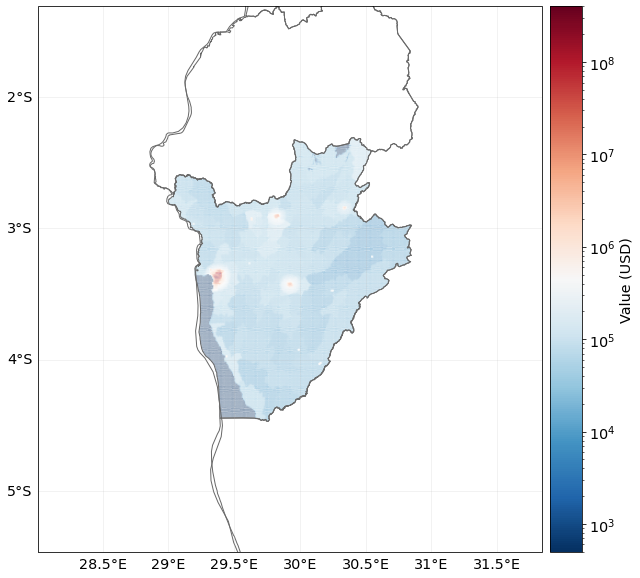

In [4]:
from climada.entity import Exposures

import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
#from Configuration import *
import os
import pandas as pd

import cartopy.crs as ccrs

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

#file_path = lp_csv_files[5] # define the full file path of the CSV-file

file_path='BDI_2021.csv'


#file_path='/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_climada/KEN_2021.csv'
new_exp = Exposures(pd.read_csv(file_path))
new_exp.check()

norm = colors.LogNorm(vmin=500, vmax=4.0e8)

ax=new_exp.plot_hexbin(norm=norm, pop_name=False, cmap='RdBu_r', buffer=1)

#fname='/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_ibf_data_resources/exposure-data/gis/ea_global_background.shp'

#ax.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),facecolor='None')

#plt.savefig('/home/bulbul/Documents/work_data/ea_climada/litpop_2021/ea_litpop_2021_test.png', bbox_inches='tight')
plt.show()

## creating disagregated asset expsoure data 

In [10]:
import geopandas as gp
#from climada.entity import LitPop

cntr_code='BDI'
db=gp.read_file('ea_ghcf_icpac.shp')
db1=db[db['GID_0']==cntr_code]
shape=db1['geometry'].tolist()[0]
shape.bounds

(29.000345230000107, -4.470001219999915, 30.85022544900005, -2.30982255899994)

In [ ]:
shape.bounds

In [13]:
import xarray as xr

db=xr.open_dataset('gpw_v4_population_count_rev11_2020_30_sec.tif')

db

<xarray.Dataset>
Dimensions:      (band: 1, x: 43200, y: 21600)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * y            (y) float64 90.0 89.99 89.98 89.97 ... -89.98 -89.99 -90.0
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

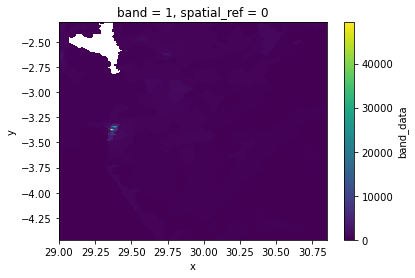

In [21]:
min_lon = 29.000345230000107
min_lat = -4.470001219999915
max_lon = 30.85022544900005
max_lat = -2.30982255899994


cropped_ds = db.sel(y=slice(max_lat,min_lat), x=slice(min_lon,max_lon))
cropped_ds['band_data'].plot()

In [9]:
db['y'].values[1]-db['y'].values[0]

-0.008333333333339965

In [1]:
import geopandas as gp
from climada.entity import LitPop

# cntr_code='BDI'
# db=gp.read_file('ea_ghcf_icpac.shp')
# db1=db[db['GID_0']==cntr_code]
# shape=db1['geometry'].tolist()[0]

#gdp_db1=gdp_db[gdp_db['iso_code']==cntr_code]
cntr_gdp=5757344704.71395
#cntr_gdp_year=gdp_db1['wb_year'].tolist()[0]
exp = LitPop.from_shape(shape,cntr_gdp, res_arcsec=30, exponents=(1, 1), \
                        value_unit='USD', reference_year=2018, gpw_version=11)
exp.set_geometry_points()
exp.set_lat_lon()
eb=exp.gdf
eb1=eb[['value', 'latitude', 'longitude', 'region_id', 'impf_']]
#eb1.to_csv(f'/home/output/{cntr_code}_{cntr_gdp_year}.csv',index=False)

NameError: name 'shape' is not defined